In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Leitura do conjunto de dados

data = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv", delimiter=',')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
### Tratamento do campo 'TotalCharges' que foi lido como str

data.loc[data['TotalCharges'] == " "] = 0
data = data.astype({'TotalCharges':float})

### Removendo campos nulos
data = data[data['OnlineBackup'] != 0]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [4]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
data.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### EDA UNIVARIADA

In [8]:
def plot_pie(ax, df, var, titulo):
    explode = tuple(np.repeat(0.01, len(df[var].unique())))
    df_pie = df[var].value_counts().reset_index()
    ax.pie(df_pie[var], labels = df_pie[var],
        autopct = "%1.1f%%", pctdistance = 0.8,
        explode = explode)
    centre_circle = plt.Circle((0.0, 0.0), 0.5, fc = 'white')
    ax.add_patch(centre_circle)
    ax.set_title(titulo)
    ax.legend(df_pie['index'], loc = "best", frameon = False)

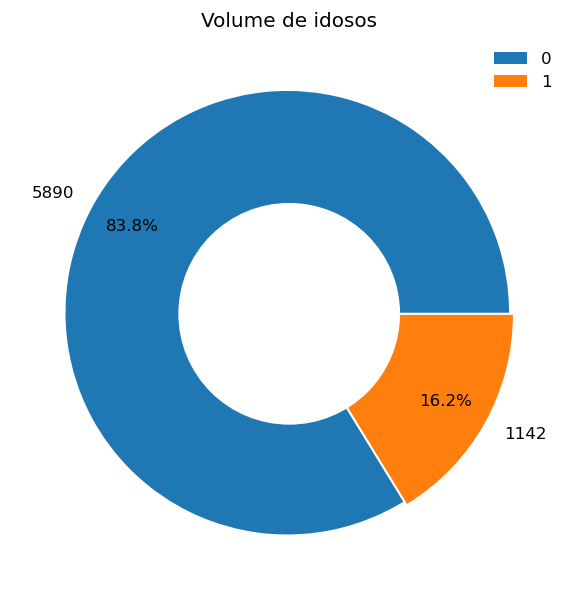

In [9]:
fig, ax = plt.subplots(dpi = 120,figsize = (6,6))
plot_pie(ax, data, 'SeniorCitizen', 'Volume de idosos')

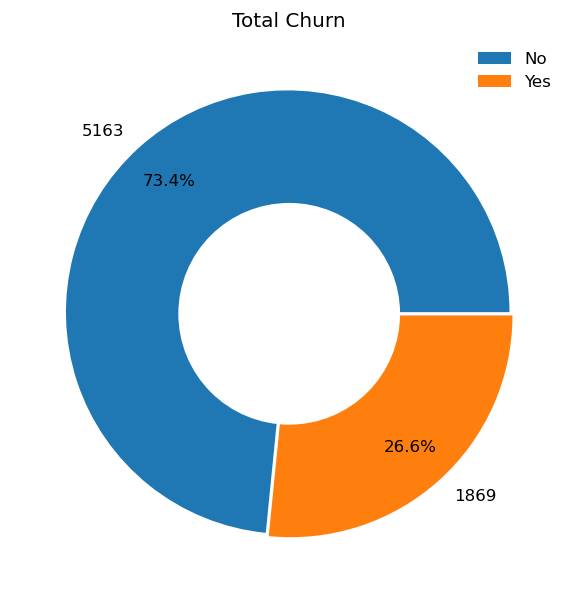

In [10]:
fig, ax = plt.subplots(dpi = 120,figsize = (9,6))
plot_pie(ax, data, 'Churn', 'Total Churn')

Text(0, 0.5, 'TotalCharges')

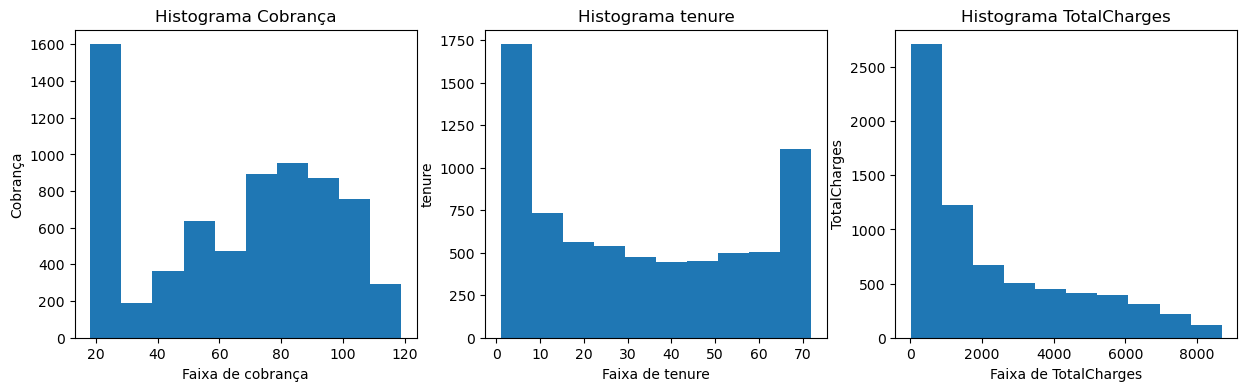

In [11]:
### Histograma das cobranças
### Tenure -> bens

fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].hist(data.MonthlyCharges, bins=10)
ax[0].set_title('Histograma Cobrança')
ax[0].set_xlabel('Faixa de cobrança')
ax[0].set_ylabel('Cobrança')
ax[1].hist(data.tenure, bins=10)
ax[1].set_title('Histograma tenure')
ax[1].set_xlabel('Faixa de tenure')
ax[1].set_ylabel('tenure')
ax[2].hist(data.TotalCharges, bins=10)
ax[2].set_title('Histograma TotalCharges')
ax[2].set_xlabel('Faixa de TotalCharges')
ax[2].set_ylabel('TotalCharges')

<AxesSubplot:>

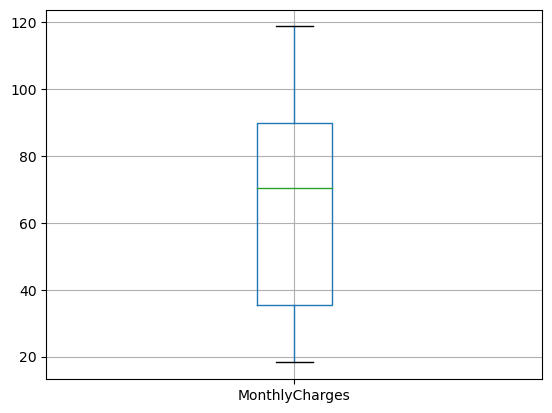

In [12]:
data[['MonthlyCharges']].boxplot()

<AxesSubplot:>

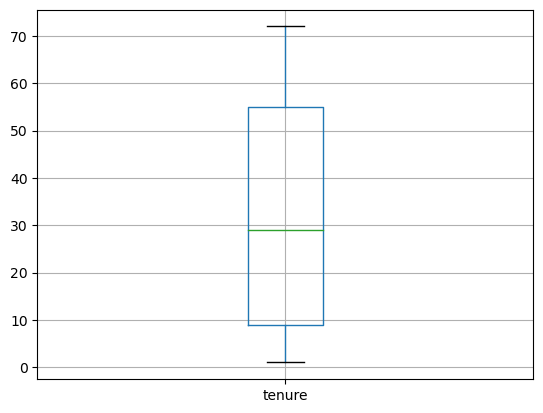

In [13]:
data[['tenure']].boxplot()

In [14]:
cols_categoric = data.columns.difference(['SeniorCitizen', 'tenure', 'MonthlyCharges']).values
cols_categoric

### 18 colunas

array(['Churn', 'Contract', 'Dependents', 'DeviceProtection',
       'InternetService', 'MultipleLines', 'OnlineBackup',
       'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod',
       'PhoneService', 'StreamingMovies', 'StreamingTV', 'TechSupport',
       'TotalCharges', 'customerID', 'gender'], dtype=object)

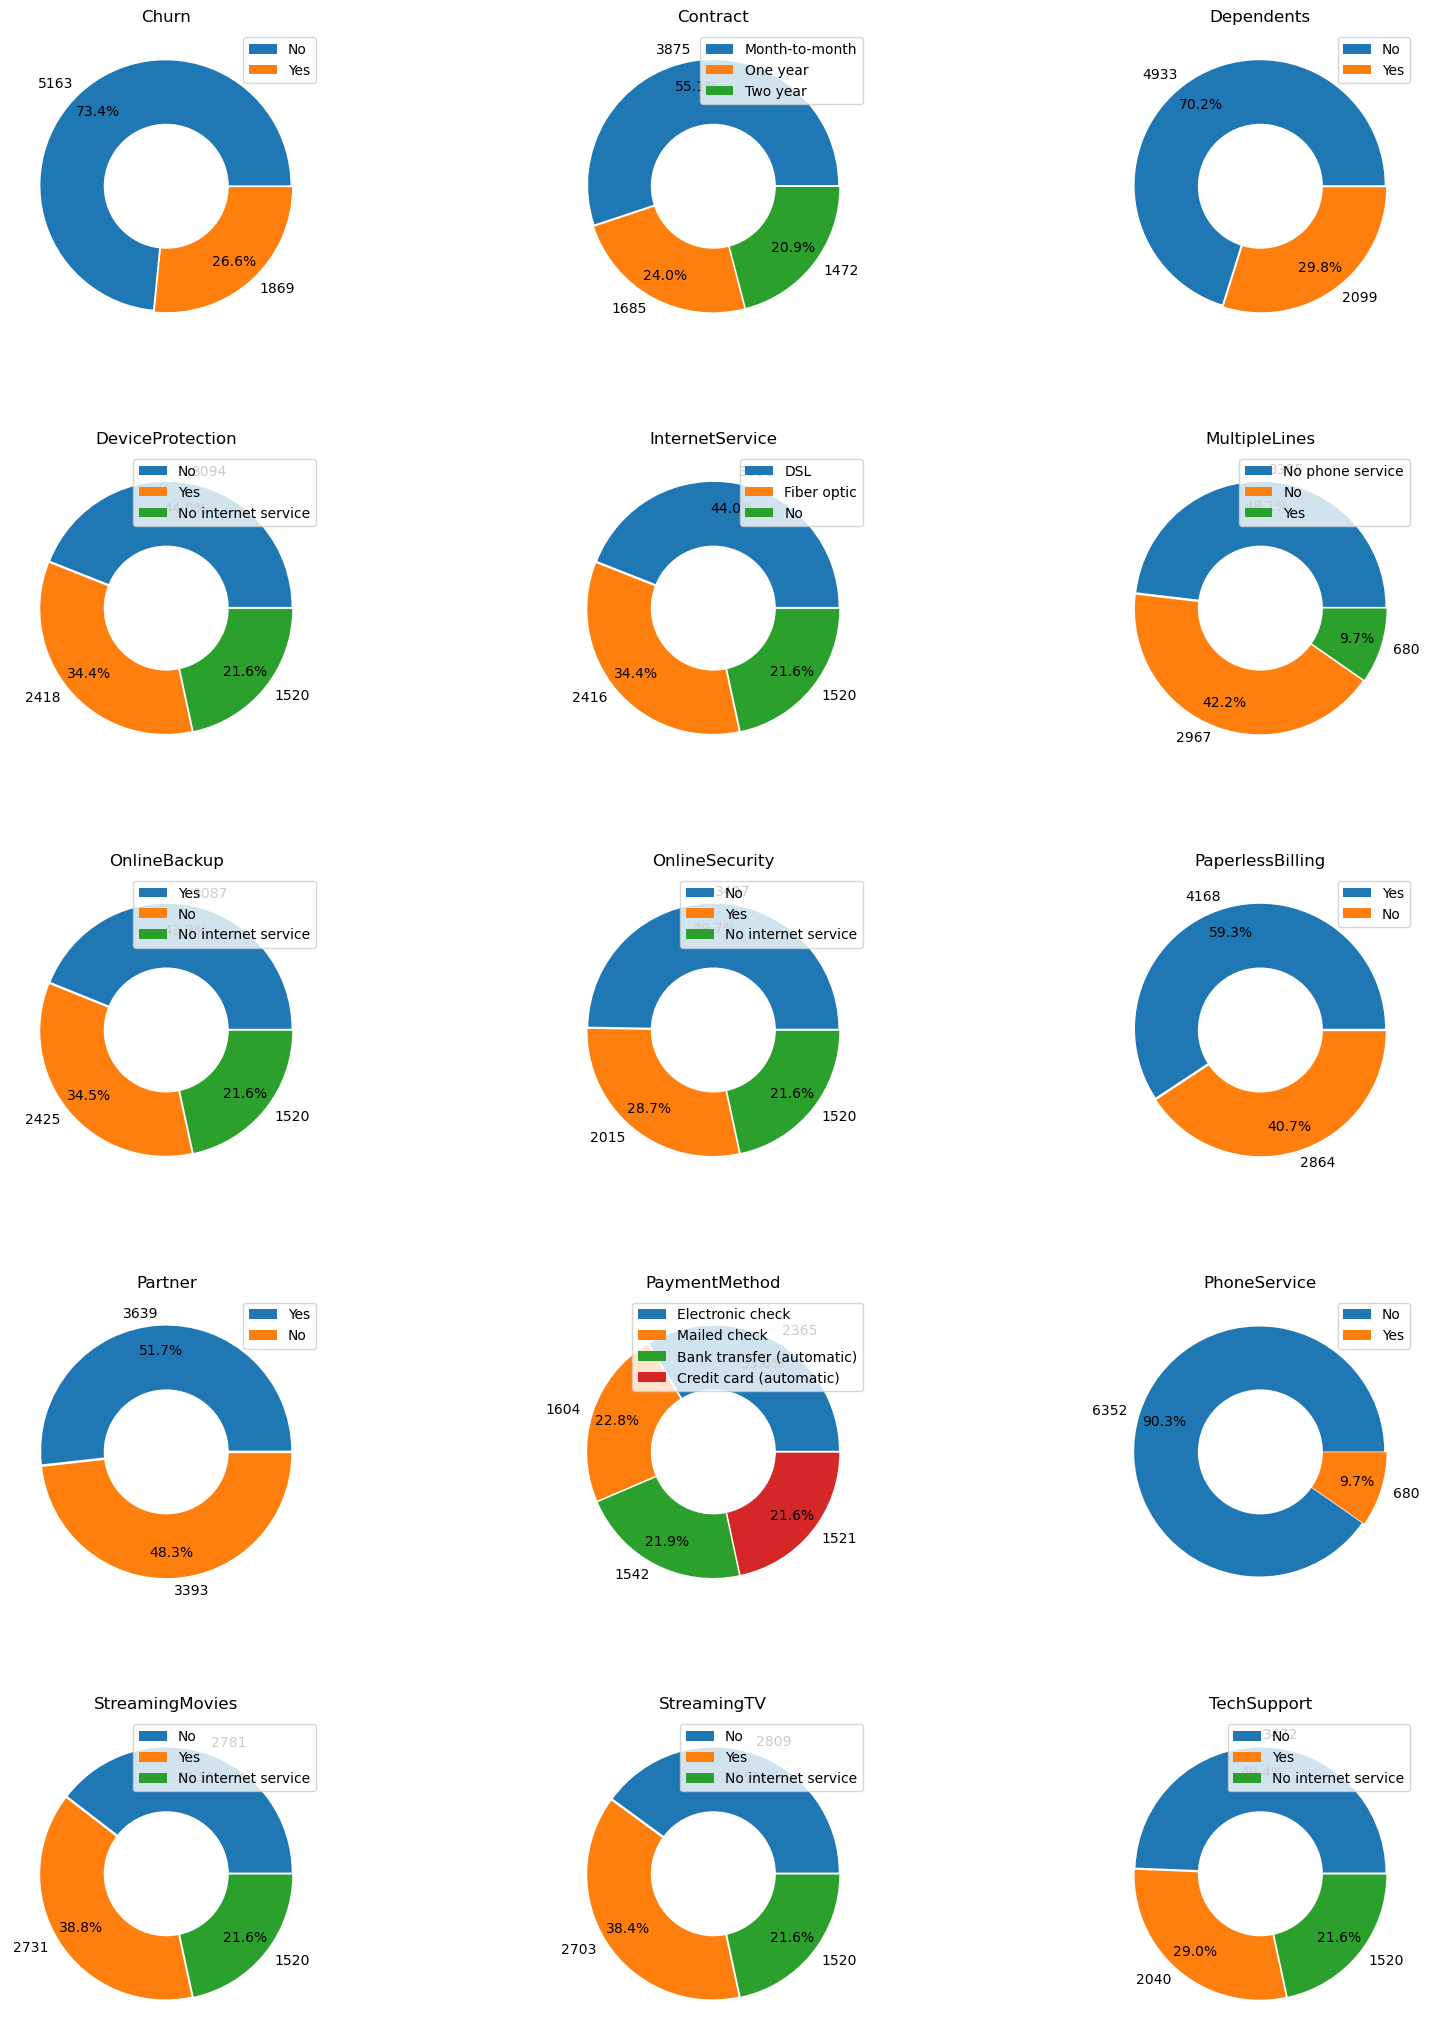

In [15]:
### Análise das distribuições de todas as variáveis categóricas

columns = 3
if (len(cols_categoric)%columns) != 0:
  rows = (len(cols_categoric)//columns)
else:
  rows = (len(cols_categoric)//columns) - 1

fig, ax = plt.subplots(rows, columns, figsize = (20,25))

k = 0
for i in range(0,rows):
  for j in range(0,columns):
    plot_pie(ax[i][j], data, cols_categoric[k], cols_categoric[k])
    #ax[i][j].set_title(cols_categoric[k])
    #ax[i][j].set_xlabel("")
    aux = data[cols_categoric[k]].unique()
    ax[i][j].legend(labels=aux, loc="best")
    k+=1  

#plt.tight_layout()
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

### EDA BIVARIADA

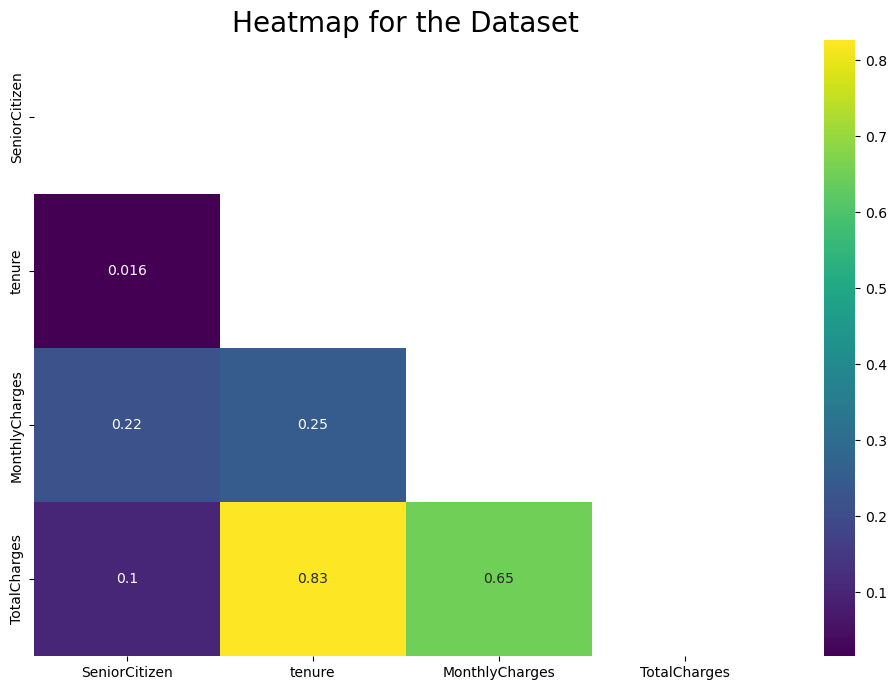

In [16]:
#HeatMap - Encontrar correlações entre as variáveis numéricas
plt.rcParams['figure.figsize'] = (12, 8)

corr = data.corr()
matrix = np.triu(corr)

sns.heatmap(corr, annot = True, cmap = "viridis", mask = matrix)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

In [17]:
### Análise cruzada do método de pagamento com o churn

sumar_PaymentMethod = pd.crosstab(data.PaymentMethod, data.Churn)
sumar_PaymentMethod = sumar_PaymentMethod[['Yes', 'No']]
sumar_PaymentMethod = sumar_PaymentMethod[(sumar_PaymentMethod.index != 0)]
sumar_PaymentMethod


Churn,Yes,No
PaymentMethod,,
Bank transfer (automatic),258,1284
Credit card (automatic),232,1289
Electronic check,1071,1294
Mailed check,308,1296


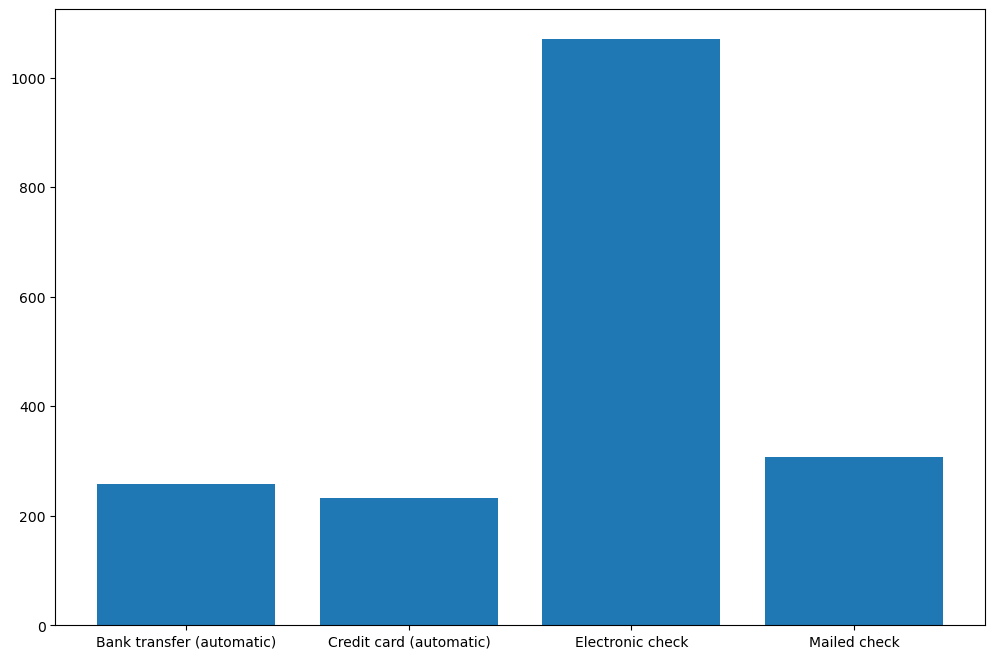

In [18]:
### Gráfico da relação do método de pagamento com o churn

fig, ax = plt.subplots()
ax.bar(sumar_PaymentMethod.index, sumar_PaymentMethod['Yes'])

plt.show()

In [19]:
cols_categoric = data.columns.difference(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'customerID', 'TotalCharges']).values
cols_categoric

array(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity',
       'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService',
       'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender'],
      dtype=object)

In [20]:
### Identificando as principais relações das variáveis categóricas

princ_rel_churn_array = []
rel_churn_array = []

for f in cols_categoric:
    fator = f
    sumar1 = pd.crosstab(data[fator], data.Churn, normalize=True)*100
    sumar1 = sumar1[['Yes', 'No']]
    sumar1[(sumar1.index != 0)]
    maior_correlação = sumar1.loc[sumar1['Yes'] == sumar1['Yes'].max()]
    princ_rel_churn_array.append(maior_correlação.index[0])
    rel_churn_array.append(maior_correlação['Yes'][0])

In [21]:
df_resultados = pd.DataFrame({"Fator" : cols_categoric, "Principal Atributo" : princ_rel_churn_array, "Correlação" : rel_churn_array})
df_resultados = df_resultados.set_index('Fator')
df_resultados.sort_values('Correlação', ascending=False)
df_resultados['Fator_Atributo'] = df_resultados.index + " - " + df_resultados['Principal Atributo']
#df_resultados.to_clipboard(excel=True)
df_resultados

,Principal Atributo,Correlação,Fator_Atributo
Fator,,,
Contract,Month-to-month,23.535267,Contract - Month-to-month
Dependents,No,21.942548,Dependents - No
DeviceProtection,No,17.221274,DeviceProtection - No
InternetService,Fiber optic,18.444255,InternetService - Fiber optic
MultipleLines,Yes,12.087600,MultipleLines - Yes
OnlineBackup,No,17.534130,OnlineBackup - No
OnlineSecurity,No,20.776451,OnlineSecurity - No
PaperlessBilling,Yes,19.908987,PaperlessBilling - Yes
Partner,No,17.064846,Partner - No


<BarContainer object of 15 artists>

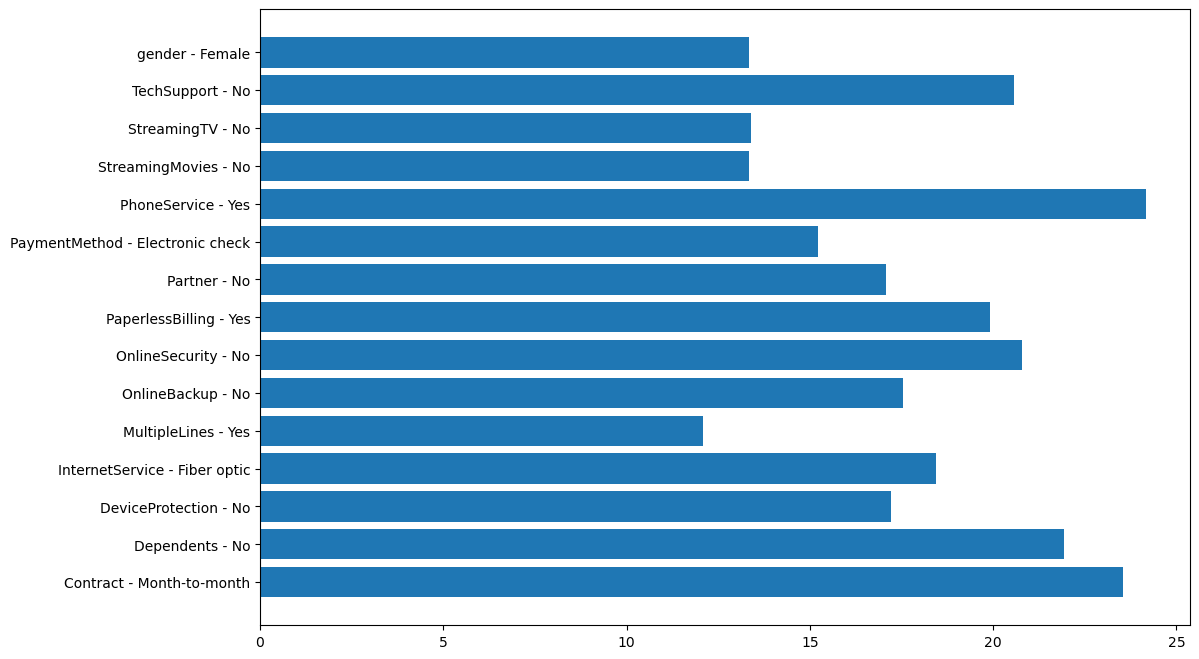

In [22]:
### Gráfico das variáveis categóricas que mais possuem correlação com o churn

fig, ax = plt.subplots()
ax.barh(df_resultados['Fator_Atributo'], df_resultados.Correlação)

In [23]:
cols_categoric

array(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity',
       'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService',
       'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender'],
      dtype=object)

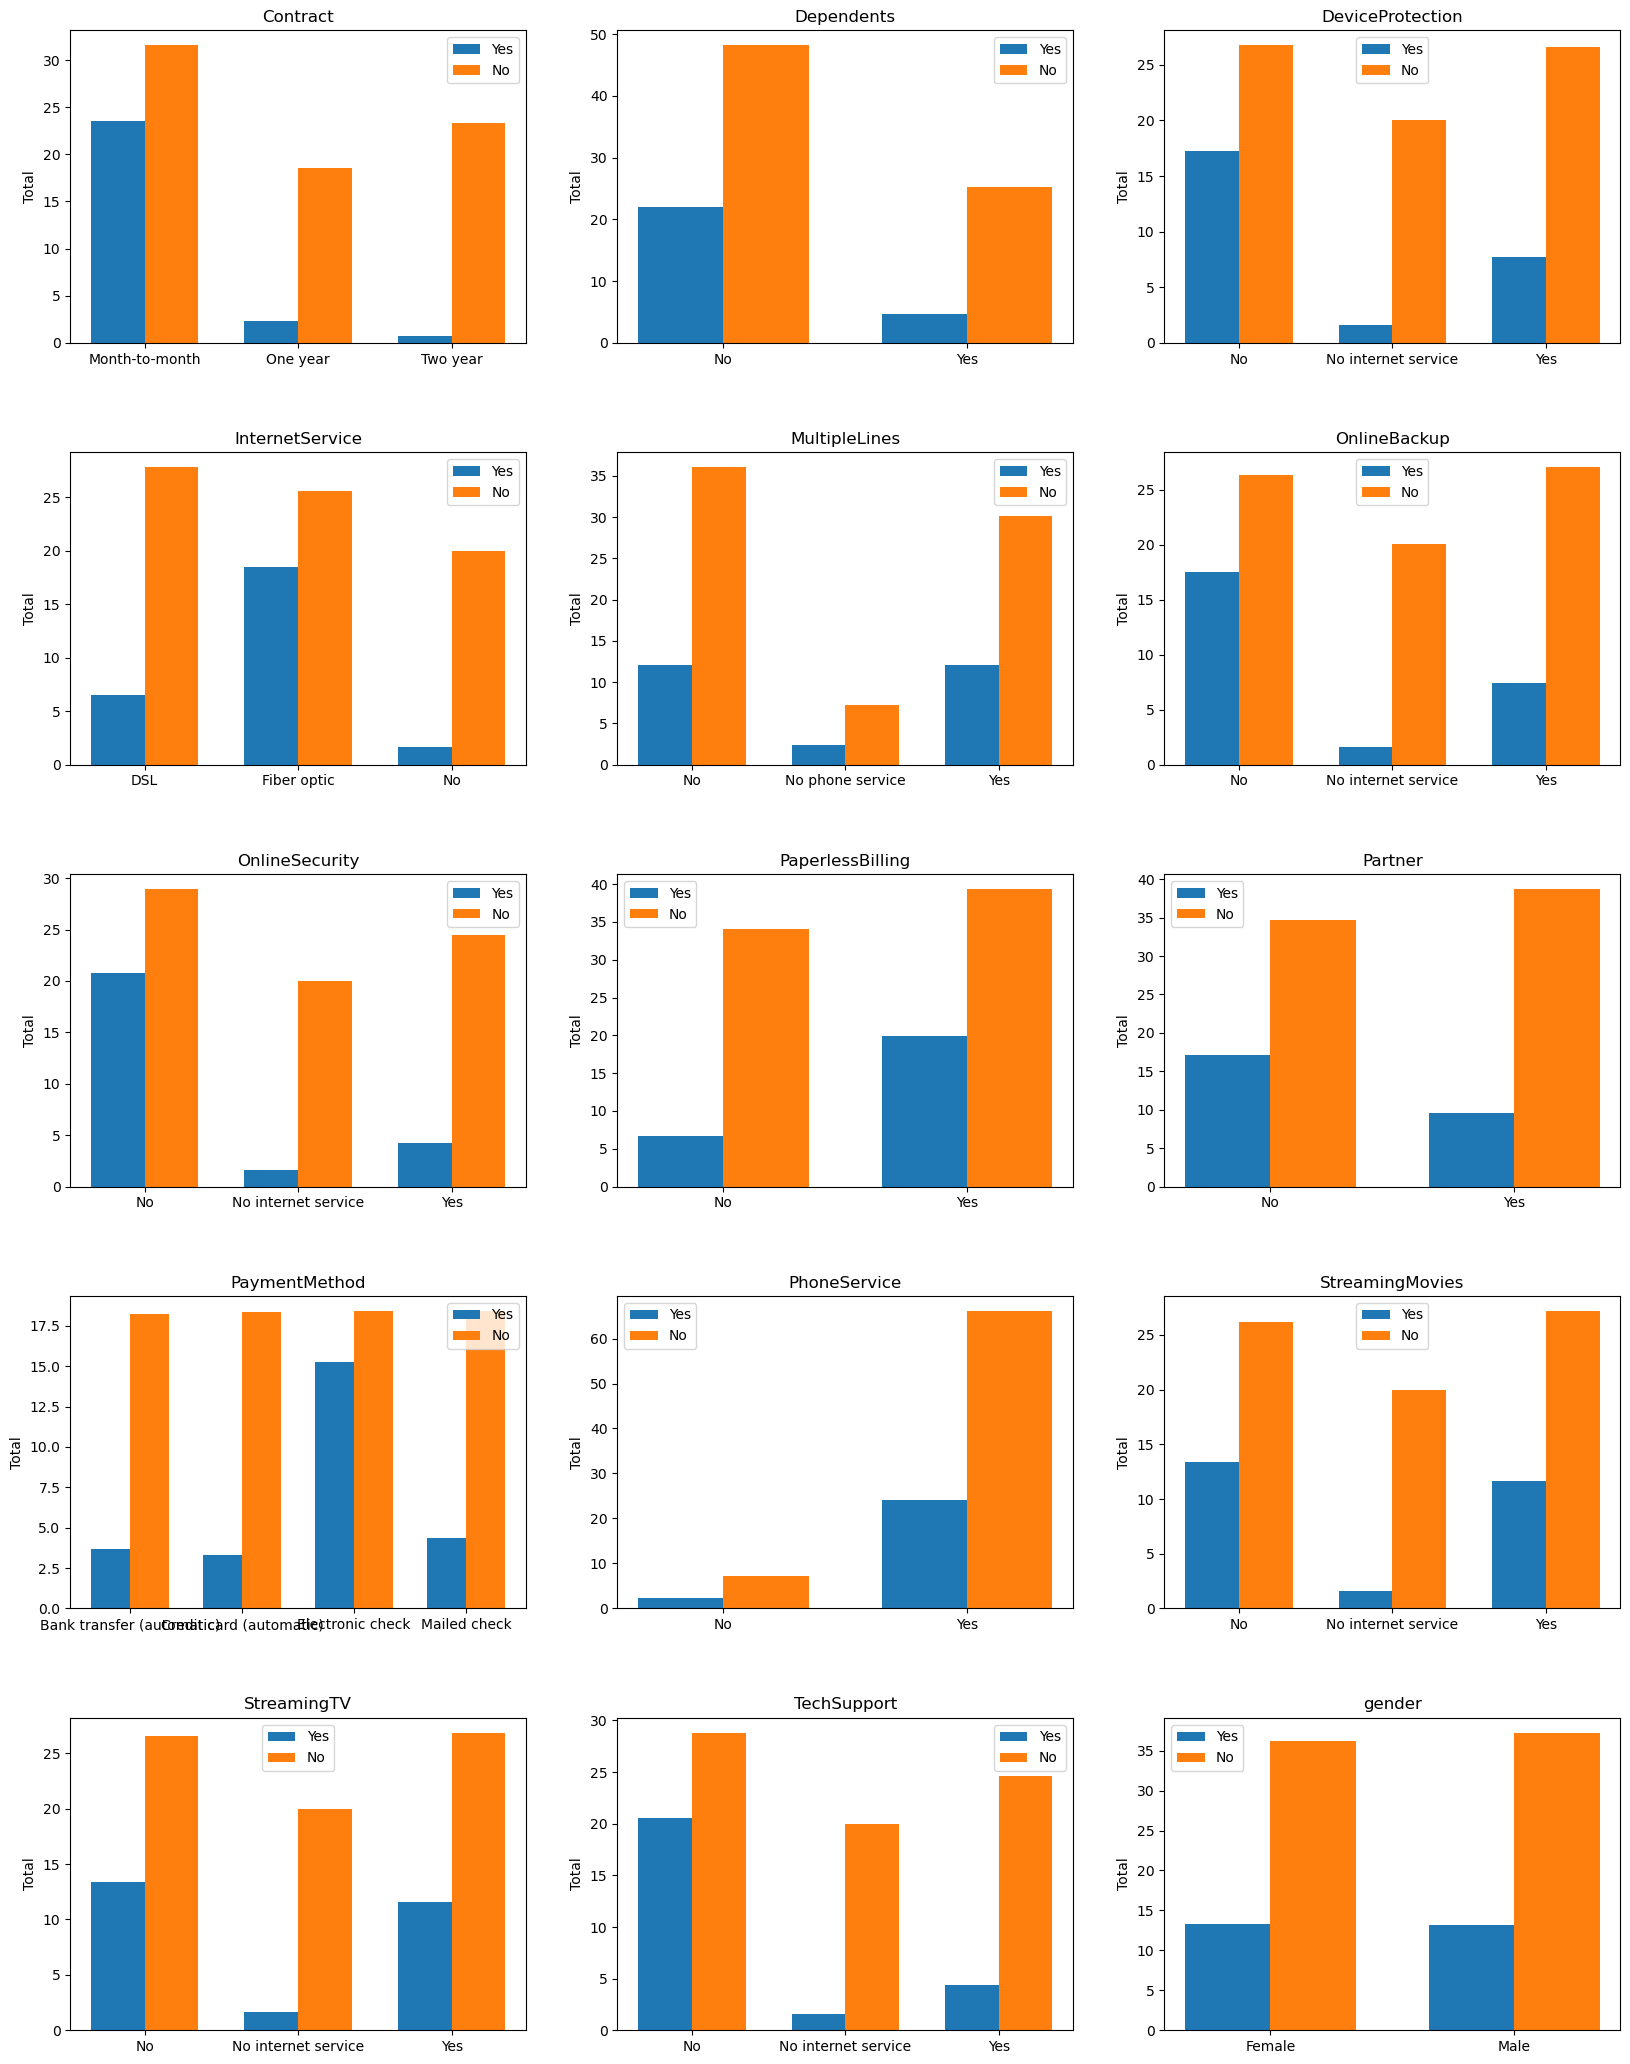

In [24]:
### Gráfico com todos os fatores

columns = 3
if (len(cols_categoric)%columns) != 0:
  rows = (len(cols_categoric)//columns)
else:
  rows = (len(cols_categoric)//columns)

fig, ax = plt.subplots(rows, columns, figsize=(20,25))
k = 0
for i in range(0,rows):
  for j in range(0,columns):
    aux = data[cols_categoric[k]]
    sumar1 = pd.crosstab(data[cols_categoric[k]], data.Churn, normalize=True)*100
    sumar1 = sumar1[['Yes', 'No']]
    sumar1 = sumar1[(sumar1.index != 0)]
    x=np.arange(len(sumar1.index))
    width = 0.35
    ax[i][j].bar(x - width/2, sumar1['Yes'], width, label='Sim')
    ax[i][j].bar(x + width/2, sumar1['No'], width, label='Não')

    ax[i][j].set_title(cols_categoric[k])
    ax[i][j].set_ylabel('Total')
    ax[i][j].legend(labels=['Yes', 'No'])
    ax[i][j].set_xticks(x)
    ax[i][j].set_xticklabels(sumar1.index)
    k+=1   
#plt.tight_layout()
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

In [25]:
### Aplicando método estatístico para determinar se efetivamente as principais variáveis possuem correlação

### Utilizando o método do qui-quadrado - manual exemplo: 'Contract'

sumar1 = pd.crosstab(data['Contract'], data.Churn)
print(sumar1)

### Tabela de valores esperados

expected_values = pd.DataFrame(index=['Month-to-month', 'One year', 'Two year', 'total'],columns=['No', 'Yes', 'total'])
expected_values['total'].loc[expected_values.index == 'Month-to-month'] = sumar1['No'].loc[sumar1.index == 'Month-to-month'] + sumar1['Yes'].loc[sumar1.index == 'Month-to-month']
expected_values['total'].loc[expected_values.index == 'One year'] = sumar1['No'].loc[sumar1.index == 'One year'] + sumar1['Yes'].loc[sumar1.index == 'One year']
expected_values['total'].loc[expected_values.index == 'Two year'] = sumar1['No'].loc[sumar1.index == 'Two year'] + sumar1['Yes'].loc[sumar1.index == 'Two year']

total = (expected_values['total'].loc[expected_values.index == 'Month-to-month'].values[0] + 
        expected_values['total'].loc[expected_values.index == 'One year'].values[0] +
        expected_values['total'].loc[expected_values.index == 'Two year'].values[0])

expected_values['total'].loc[expected_values.index == 'total'] = total
expected_values['No'].loc[expected_values.index == 'total'] = sum(sumar1['No'])
expected_values['Yes'].loc[expected_values.index == 'total'] = sum(sumar1['Yes'])

for i in expected_values.index:

    row_total = expected_values['total'].loc[expected_values.index == i].values[0]
    column_total = expected_values['No'].loc[expected_values.index == 'total'].values[0]
    grand_total = total
    expected_values['No'].loc[expected_values.index == i] = (row_total * column_total) / total

for i in expected_values.index:

    row_total = expected_values['total'].loc[expected_values.index == i].values[0]
    column_total = expected_values['Yes'].loc[expected_values.index == 'total'].values[0]
    grand_total = total
    expected_values['Yes'].loc[expected_values.index == i] = (row_total * column_total) / total

print(expected_values)

### Mesa do qui-quadrado

observado = []
observado.extend(sumar1['No'].values.tolist())
observado.extend(sumar1['Yes'].values.tolist())

calculado = []
calculado.extend(expected_values['No'].loc[expected_values.index != 'total'].values.tolist())
calculado.extend(expected_values['Yes'].loc[expected_values.index != 'total'].values.tolist())
mesa_qui2 = pd.DataFrame({'observado (o)' : observado, 'calculado (c)' : calculado})
mesa_qui2['(oc)^2/c'] = ((mesa_qui2['observado (o)'] - mesa_qui2['calculado (c)'])**2) / mesa_qui2['calculado (c)']
print(mesa_qui2)

print('\nO Valor calculado do qui-quadrado é',sum(mesa_qui2['(oc)^2/c']))
print('\nGraus de liberdade da tabela: 2 -> Qui quadrado crítico = 5,991')
print('\nComo o valor do qui-quadrado > Valor crítico, as variáveis possuem uma relação')

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48
                         No          Yes total
Month-to-month  2845.083191  1029.916809  3875
One year        1080.764505   391.235495  1472
Two year        1237.152304   447.847696  1685
total                5163.0       1869.0  7032
   observado (o)  calculado (c)    (oc)^2/c
0           2220    2845.083191  137.334823
1           1306    1080.764505   46.939947
2           1637    1237.152304  129.230799
3           1655    1029.916809  379.379181
4            166     391.235495  129.668777
5             48     447.847696  356.992302

O Valor calculado do qui-quadrado é 1179.5458287339447

Graus de liberdade da tabela: 2 -> Qui quadrado crítico = 5,991

Como o valor do qui-quadrado > Valor crítico, as variáveis possuem uma relação


In [26]:
### Utilizando o método do qui-quadrado - chi2_contingency

from scipy.stats import chi2_contingency

fatores = cols_categoric
alpha_values = []
stat_values = []
GL_values = []
p_value = []
result_qui2 = []

for fator in fatores:
    sumar1 = pd.crosstab(data[fator], data.Churn)
    data_qui2 = []

    for i in sumar1.index.tolist():
        ### Definindo a tabela
        data_qui2.extend(sumar1.loc[sumar1.index == i].values.tolist())

    stat, p, dof, expected = chi2_contingency(data_qui2)

    # interpret p-value
    alpha = 0.001
    stat_values.append(stat)
    GL_values.append(dof)
    p_value.append(p)
    alpha_values.append(alpha)
    #print(fator,"- p value is " + str(p))
    if p <= alpha:
        #print(fator,'- Dependent (reject H0)')
        result_qui2.append('Dependent (reject H0)')
    else:
        #print(fator,'- Independent (H0 holds true)')
        result_qui2.append('Independent (H0 holds true)')

df_result_qui2 = pd.DataFrame({'fator' : fatores, 'stat' : stat_values, 'GL_value' : GL_values, 'p_value' : p_value, 'result' : result_qui2})
df_result_qui2.sort_values('p_value')

,fator,stat,GL_value,p_value,result
0,Contract,1179.545829,2,7.326182e-257,Dependent (reject H0)
6,OnlineSecurity,846.677389,2,1.400687e-184,Dependent (reject H0)
13,TechSupport,824.925564,2,7.407808e-180,Dependent (reject H0)
3,InternetService,728.695614,2,5.831199e-159,Dependent (reject H0)
9,PaymentMethod,645.429900,3,1.426310e-139,Dependent (reject H0)
5,OnlineBackup,599.175185,2,7.776099e-131,Dependent (reject H0)
2,DeviceProtection,555.880327,2,1.959389e-121,Dependent (reject H0)
11,StreamingMovies,374.268432,2,5.353560e-82,Dependent (reject H0)
12,StreamingTV,372.456502,2,1.324641e-81,Dependent (reject H0)
7,PaperlessBilling,256.874908,1,8.236203e-58,Dependent (reject H0)


### Conclusões:
Conforme verificamos nas análises. há algumas variáveis categóricas as quais possuem um maior indicativo de churn:

- PaymentMethod - Eletronic Check
- Contract - Month to Month
- Device protection - No
- Online Security - No
- Online Backup - No

O que falta saber:

-Há alguma correlação das variáveis numéricas com o churn?

In [27]:
df_mean = data.groupby('Churn').mean()
df_mean = df_mean[(df_mean.index != 0)]
df_mean = df_mean.T
df_median = data.groupby('Churn').median()
df_median = df_median[(df_median.index != 0)]
df_median = df_median.T

print('Média', '\n', df_mean, '\n')
print('Mediana', '\n', df_median, '\n')

Média 
 Churn                    No          Yes
SeniorCitizen      0.128995     0.254682
tenure            37.650010    17.979133
MonthlyCharges    61.307408    74.441332
TotalCharges    2555.344141  1531.796094 

Mediana 
 Churn                No     Yes
SeniorCitizen      0.00    0.00
tenure            38.00   10.00
MonthlyCharges    64.45   79.65
TotalCharges    1683.60  703.55 



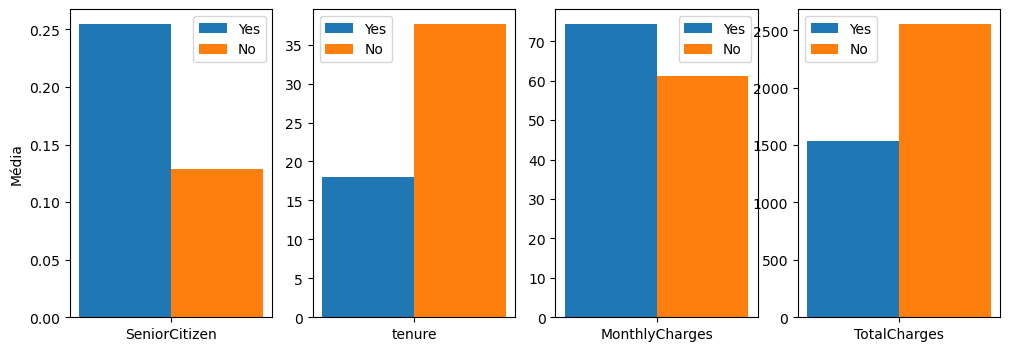

In [28]:
### Correlação das variáveis numéricas com o Churn

fig, ax = plt.subplots(1, 4, figsize = (12,4))

x=np.arange(1)
width = 0.35

ax[0].bar(x - width/2, df_mean[df_mean.index == 'SeniorCitizen']['Yes'], width)
ax[0].bar(x + width/2, df_mean[df_mean.index == 'SeniorCitizen']['No'], width)
ax[0].set_ylabel('Média')
ax[0].legend(labels=['Yes', 'No'])
ax[0].set_xticks(x)
ax[0].set_xticklabels(df_mean[df_mean.index == 'SeniorCitizen'].index)

ax[1].bar(x - width/2, df_mean[df_mean.index == 'tenure']['Yes'], width)
ax[1].bar(x + width/2, df_mean[df_mean.index == 'tenure']['No'], width)
#ax[1].set_ylabel('Média')
ax[1].legend(labels=['Yes', 'No'])
ax[1].set_xticks(x)
ax[1].set_xticklabels(df_mean[df_mean.index == 'tenure'].index)

ax[2].bar(x - width/2, df_mean[df_mean.index == 'MonthlyCharges']['Yes'], width)
ax[2].bar(x + width/2, df_mean[df_mean.index == 'MonthlyCharges']['No'], width)
#ax[2].set_ylabel('Média')
ax[2].legend(labels=['Yes', 'No'])
ax[2].set_xticks(x)
ax[2].set_xticklabels(df_mean[df_mean.index == 'MonthlyCharges'].index)

ax[3].bar(x - width/2, df_mean[df_mean.index == 'TotalCharges']['Yes'], width)
ax[3].bar(x + width/2, df_mean[df_mean.index == 'TotalCharges']['No'], width)
#ax[3].set_ylabel('Média')
ax[3].legend(labels=['Yes', 'No'])
ax[3].set_xticks(x)
ax[3].set_xticklabels(df_mean[df_mean.index == 'TotalCharges'].index)

plt.show()

### EDA MULTIVARIADA

c:\Users\ferna\miniconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


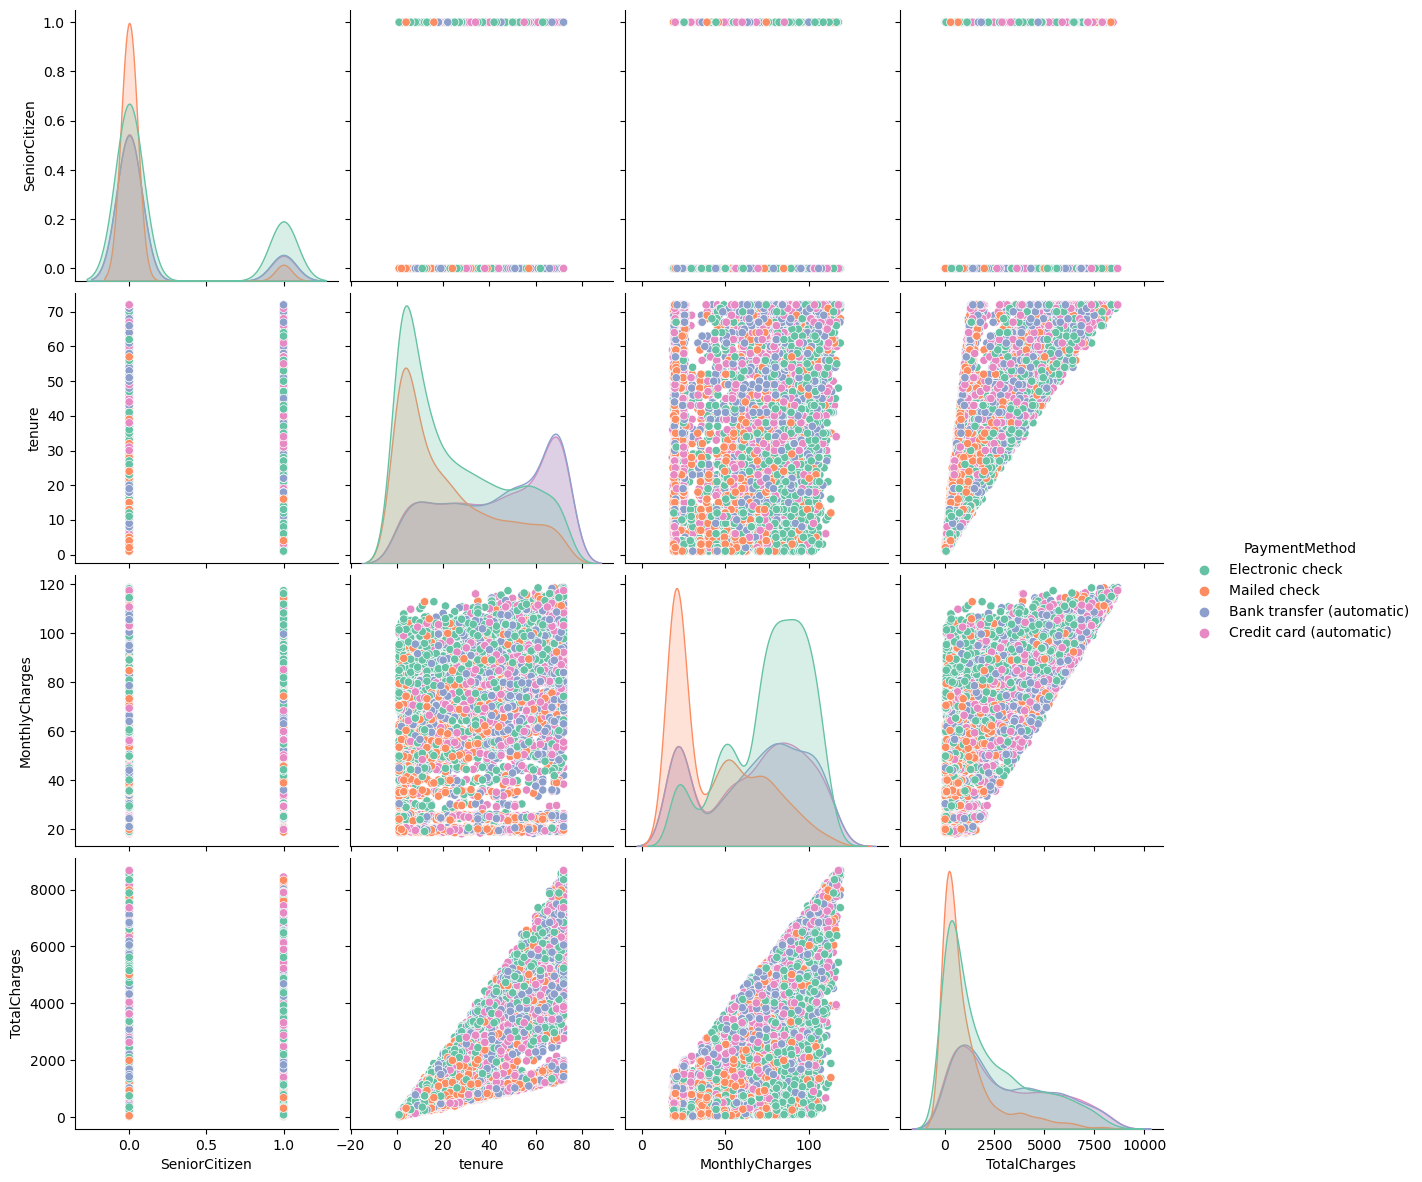

In [29]:
# Análise do método de pagamento
sns.pairplot(data, hue = 'PaymentMethod' , size = 3 , palette = 'Set2')

c:\Users\ferna\miniconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


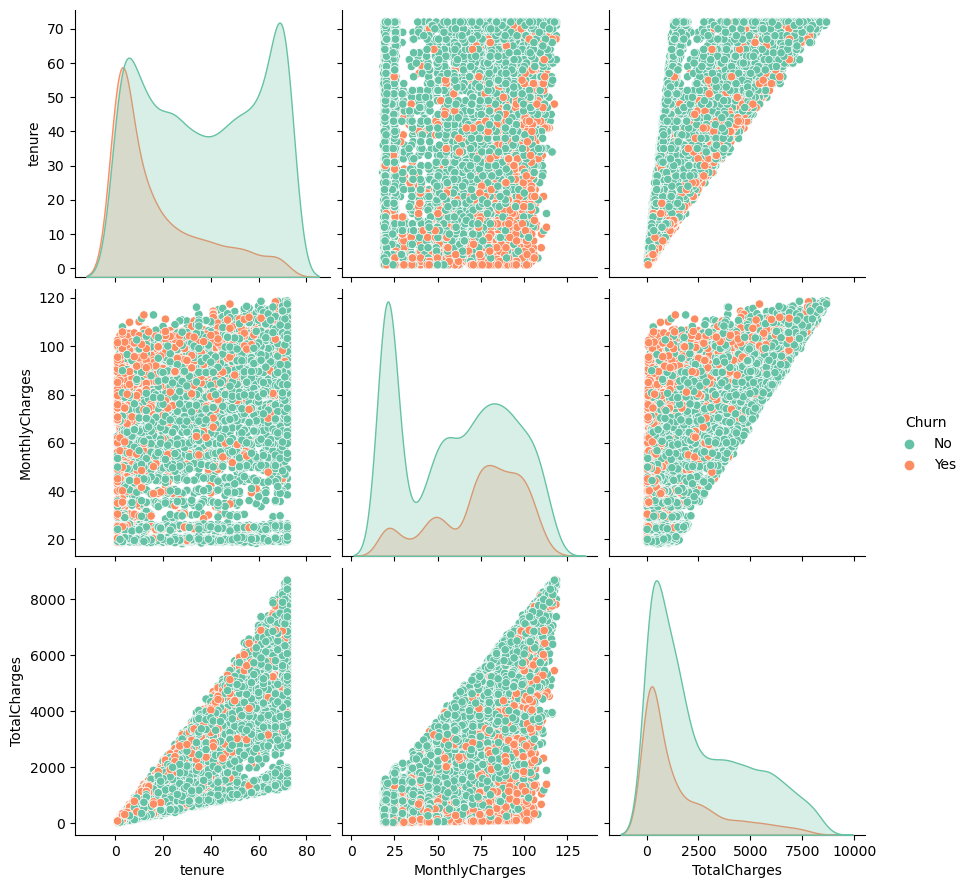

In [30]:
# Análise do churn
sns.pairplot(data.drop(columns=('SeniorCitizen')), hue = 'Churn' , size = 3 , palette = 'Set2')

### **SELEÇÃO DOS MODELOS**

Objetivo do projeto -> Criar Score para identificação dos clientes mais propensos ao Churn para, através de atendimento proativo, reduzir o Churn

Será feita uma análise dos diferentes métodos usando hiperparâmetros semelhantes, visando identificar o método mais adequado. Posteriormente, na próxima entrega, será feita o otimização dos hiperparâmetros

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

### Variável target (y) = Churn

In [5]:
### Transformando as variáveis categóricas em dummies e removendo o customerID

df_dummy0 = pd.get_dummies(data.drop(columns=['customerID', 'Churn']))
df_dummy0.columns 

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [6]:
### Separando 'Yes', 'No' em 1 e 0

data['Churn'] = data['Churn'].replace(('Yes', 'No'), (1, 0))

#Separamos em X e y
X = df_dummy0
y = data.Churn

# Dividimos 30% para teste e 70% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, 
                                                          random_state = 42)

In [7]:
def fit_model_metrics(modelo, X_train, y_train):
    #Ajuste do modelo
    modelo = modelo.fit(X_train, y_train)

    y_train_pred = modelo.predict(X_train)
    y_test_pred  = modelo.predict(X_test)

    #Calculo da acurácia do teste
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Precisão!
    prec = precision_score(y_test, y_test_pred)

    # Recall ou Sensibilidade
    rec = recall_score(y_test, y_test_pred)

    # Calculo do F1 score
    f1 = f1_score(y_test, y_test_pred)

    print('% Acertos teste:', test_accuracy)
    print("Precisão:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)

    result = {'Acurácia' : test_accuracy, 'Precisão' : prec, 'Recall' : rec, 'F1 Score' : f1}

    return result

In [11]:
### Decision Tree

dstree = DecisionTreeClassifier()

decision_tree = fit_model_metrics(dstree, X_train, y_train)

result_metrics = pd.DataFrame(data = decision_tree, index=[0])
result_metrics

% Acertos teste: 0.7312796208530805
Precisão: 0.49480968858131485
Recall: 0.5098039215686274
F1 Score: 0.5021949078138718


,Acurácia,Precisão,Recall,F1 Score
0,0.73128,0.49481,0.509804,0.502195


In [13]:
### Random forest
rf = RandomForestClassifier()

dict_rf = fit_model_metrics(rf, X_train, y_train)

#result_metrics = result_metrics.append(dict_rf, ignore_index=True)

% Acertos teste: 0.7805687203791469
Precisão: 0.6155660377358491
Recall: 0.46524064171123
F1 Score: 0.5299492385786803


In [14]:
### Regressão Logística

reg_logistica = LogisticRegression()

dict_reglog = fit_model_metrics(reg_logistica, X_train, y_train)
#result_metrics = result_metrics.append(dict_reglog, ignore_index=True)

% Acertos teste: 0.7962085308056872
Precisão: 0.6396588486140725
Recall: 0.5347593582887701
F1 Score: 0.5825242718446603


c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
### KNN

knn = KNeighborsClassifier()

dict_knn = fit_model_metrics(knn, X_train, y_train)

result_metrics = result_metrics.append(dict_knn, ignore_index=True)

% Acertos teste: 0.771563981042654
Precisão: 0.5916473317865429
Recall: 0.45454545454545453
F1 Score: 0.5141129032258064


C:\Users\ferna\AppData\Local\Temp\ipykernel_13184\3176927865.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_metrics = result_metrics.append(dict_knn, ignore_index=True)


In [36]:
### SVM 
# Necessidade de aplicar pelo menos 2 parâmetros para o modelos trazer resultados consistentes 

svm = SVC(C = 50, kernel = 'rbf')

dict_svm = fit_model_metrics(svm, X_train, y_train)
result_metrics = result_metrics.append(dict_svm, ignore_index=True)

% Acertos teste: 0.7777251184834123
Precisão: 0.6533333333333333
Recall: 0.3493761140819964
F1 Score: 0.4552845528455285


C:\Users\ferna\AppData\Local\Temp\ipykernel_13184\38817785.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_metrics = result_metrics.append(dict_svm, ignore_index=True)


In [37]:
# Gradient

grad = GradientBoostingClassifier()
 
dict_gradient = fit_model_metrics(grad, X_train, y_train)
result_metrics = result_metrics.append(dict_gradient, ignore_index=True)

% Acertos teste: 0.8
Precisão: 0.6534216335540839
Recall: 0.5276292335115864
F1 Score: 0.5838264299802761


C:\Users\ferna\AppData\Local\Temp\ipykernel_13184\4121452358.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_metrics = result_metrics.append(dict_gradient, ignore_index=True)


In [38]:
### Adaboost

ada = AdaBoostClassifier()

dict_ada = fit_model_metrics(ada, X_train, y_train)
result_metrics = result_metrics.append(dict_ada, ignore_index=True)

% Acertos teste: 0.7909952606635071
Precisão: 0.6333333333333333
Recall: 0.5080213903743316
F1 Score: 0.5637982195845698


C:\Users\ferna\AppData\Local\Temp\ipykernel_13184\1267992780.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_metrics = result_metrics.append(dict_ada, ignore_index=True)


In [39]:
### Xgboost

xgboost = xgb.XGBClassifier()

#y_train_xgb = y_train.replace(('Yes', 'No'), (1, 0))
#y_test_xgb = y_test.replace(('Yes', 'No'), (1, 0))

dict_xgb = fit_model_metrics(xgboost, X_train, y_train)
result_metrics = result_metrics.append(dict_xgb, ignore_index=True)

% Acertos teste: 0.7791469194312797
Precisão: 0.6004228329809725
Recall: 0.5062388591800356
F1 Score: 0.5493230174081238


C:\Users\ferna\AppData\Local\Temp\ipykernel_13184\857773786.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_metrics = result_metrics.append(dict_xgb, ignore_index=True)


In [42]:
### LigthGBM

lgb = lgb.LGBMClassifier()

dict_lgb = fit_model_metrics(lgb, X_train, y_train)
result_metrics = result_metrics.append(dict_lgb, ignore_index=True)

% Acertos teste: 0.7876777251184834
Precisão: 0.6189473684210526
Recall: 0.5240641711229946
F1 Score: 0.5675675675675675


C:\Users\ferna\AppData\Local\Temp\ipykernel_13184\2664976021.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_metrics = result_metrics.append(dict_lgb, ignore_index=True)


In [43]:
list = ['Decicion Tree', 'Randon Forrest', 'Regressão Logística', 'KNN', 'SVM', 'Gradient', 'Adaboost', 'Xgboost', 'LigthGBM']

result_metrics.index = list
result_metrics

,Acurácia,Precisão,Recall,F1 Score
Decicion Tree,0.727488,0.487973,0.506239,0.496938
Randon Forrest,0.780095,0.612009,0.472371,0.533199
Regressão Logística,0.796682,0.641026,0.534759,0.583090
KNN,0.771564,0.591647,0.454545,0.514113
SVM,0.777725,0.653333,0.349376,0.455285
Gradient,0.800000,0.653422,0.527629,0.583826
Adaboost,0.790995,0.633333,0.508021,0.563798
Xgboost,0.779147,0.600423,0.506239,0.549323
LigthGBM,0.787678,0.618947,0.524064,0.567568


In [44]:
result_metrics.index.name = 'Modelo'
result_metrics

,Acurácia,Precisão,Recall,F1 Score
Modelo,,,,
Decicion Tree,0.727488,0.487973,0.506239,0.496938
Randon Forrest,0.780095,0.612009,0.472371,0.533199
Regressão Logística,0.796682,0.641026,0.534759,0.583090
KNN,0.771564,0.591647,0.454545,0.514113
SVM,0.777725,0.653333,0.349376,0.455285
Gradient,0.800000,0.653422,0.527629,0.583826
Adaboost,0.790995,0.633333,0.508021,0.563798
Xgboost,0.779147,0.600423,0.506239,0.549323
LigthGBM,0.787678,0.618947,0.524064,0.567568


In [8]:
### Definindo Função do GridSearch -> Scoring: F1

def grid_search_F1(modelo, param_grid, X_train, y_train):
    model = GridSearchCV(modelo, param_grid=param_grid, scoring='f1', cv=5)
    model.fit(X_train, y_train)
    return [model.best_params_, model.best_score_]

In [47]:
### Encontro Melhores Hyperparâmetros Árvore de Decisão

param_grid_tree = {'criterion':['gini', 'log_loss', 'entropy'],
                    'min_samples_split': [2,3,5,10],
                    'min_samples_leaf': [1,2,3,5], 
                    'random_state':[25,100,500]}

result_grid_tree = grid_search_F1(dstree, param_grid_tree, X_train, y_train)
result_grid_tree

In [22]:
### Encontro Melhores Hyperparâmetros Random forest

param_grid_rf = {'n_estimators':[50,100],
                 'criterion':['gini', 'log_loss', 'entropy'],
                 'min_samples_leaf': [1,3,5], 
                 'random_state':[25,100,200]}

result_grid_rf = grid_search_F1(rf, param_grid_rf, X_train, y_train)
result_grid_rf

[{'criterion': 'gini',
  'min_samples_leaf': 3,
  'n_estimators': 50,
  'random_state': 25},
 0.5831145150544806]

In [15]:
### Encontro Melhores Hyperparâmetros Regressão Logística

param_grid_reglog = {'penalty' : ['l1', 'l2', 'elasticnet', ''],
                     'dual':[True, False],
                     'C': [1,3,10],
                     'random_state':[25,100,500]}

result_grid_reglog = grid_search_F1(reg_logistica, param_grid_reglog, X_train, y_train)
result_grid_reglog

c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[{'C': 10, 'dual': False, 'penalty': 'l2', 'random_state': 25},
 0.6050653521596053]

In [24]:
### Encontro Melhores Hyperparâmetros KNN

param_grid_knn = {'n_neighbors':np.arange(1, 10),
                    'weights': ['uniform', 'distance'], 
                    'leaf_size':[1,3,5,7,10],
                    'algorithm':['auto', 'kd_tree']}

result_grid_knn = grid_search_F1(knn, param_grid_knn, X_train, y_train)
result_grid_knn

[{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'},
 0.5180336894614264]

In [19]:
### Encontro Melhores Hyperparâmetros SVM 

svm = SVC()

param_grid_SVM = {'C': [1],
                  'kernel' : ['linear', 'poly', 'rbf'],
                  'degree' : [3]}

result_grid_SVM = grid_search_F1(svm, param_grid_SVM, X_train, y_train)
result_grid_SVM

[{'C': 1, 'degree': 3, 'kernel': 'linear'}, 0.5354488572229579]

In [25]:
### Encontro Melhores Hyperparâmetros Gradient

param_grid_grad = {'loss': ['log_loss', 'exponential'],
                  'learning_rate' : [0.1, 1, 10],
                  'n_estimators':[50,100,200]}

result_grid_grad = grid_search_F1(grad, param_grid_grad, X_train, y_train)
result_grid_grad

[{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100},
 0.5969476415971355]

In [26]:
### Encontro Melhores Hyperparâmetros Adaboost

param_grid_ada = {'n_estimators':[50,100,200],
                  'learning_rate' : [0.1, 1, 10],
                  'random_state':[25,100,500]}

result_grid_ada = grid_search_F1(ada, param_grid_ada, X_train, y_train)
result_grid_ada

[{'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 25},
 0.5990432255209359]

In [27]:
### Encontro Melhores Hyperparâmetros Xgboost

param_grid_xgboost = {'booster': ['gbtree', 'gblinear', 'dart'],
                      'eta' : [0.1, 1, 10]}

result_grid_xgboost = grid_search_F1(xgboost, param_grid_xgboost, X_train, y_train)
result_grid_xgboost

[{'booster': 'gblinear', 'eta': 1}, 0.5995459928025821]

In [28]:
### Encontro Melhores Hyperparâmetros LigthGBM

param_grid_lgb = {'min_data_in_leaf': [20, 50, 100],
                  'bagging_seed' : [0.1, 0.5, 1],
                  'extra_trees' : [True, False]}

result_grid_lgb = grid_search_F1(lgb, param_grid_lgb, X_train, y_train)
result_grid_lgb

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min

c:\Users\ferna\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ferna\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ferna\miniconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "c:\Users\ferna\miniconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  F

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


[{'bagging_seed': 1, 'extra_trees': False, 'min_data_in_leaf': 100},
 0.5859593064332398]

In [29]:
result_grid = pd.DataFrame(np.array(result_grid_tree), columns=['Decision Tree']).T
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_rf), columns=['Randon Forrest']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_reglog), columns=['Regressão Logística']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_knn), columns=['KNN']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_grad), columns=['Gradient']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_lgb), columns=['LigthGBM']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_ada), columns=['Adaboost']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_xgboost), columns=['Xgboost']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_SVM), columns=['SVM']).T])
result_grid.columns = ['Params', 'F1']
result_grid.sort_values('F1', ascending=False)

,Params,F1
Regressão Logística,"{'C': 10, 'dual': False, 'penalty': 'l2', 'ran...",0.603381
Xgboost,"{'booster': 'gblinear', 'eta': 1}",0.599546
Adaboost,"{'learning_rate': 0.1, 'n_estimators': 200, 'r...",0.599043
Gradient,"{'learning_rate': 0.1, 'loss': 'exponential', ...",0.596948
LigthGBM,"{'bagging_seed': 1, 'extra_trees': False, 'min...",0.585959
Randon Forrest,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.583115
SVM,"{'C': 1, 'degree': 3, 'kernel': 'linear'}",0.535449
Decision Tree,"{'criterion': 'log_loss', 'min_samples_leaf': ...",0.528468
KNN,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.518034


In [8]:
import shap
from sklearn.feature_extraction.text import TfidfVectorizer

shap.initjs()

C:\Users\ferna\AppData\Roaming\Python\Python311\site-packages\shap\utils\_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\ferna\AppData\Roaming\Python\Python311\site-packages\shap\utils\_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\ferna\AppData\Roaming\Python\Python311\site-packages\shap\utils\_clus

In [39]:
### Modelo escolhido: regressão Logística

vectorizer = TfidfVectorizer(min_df=5)
X_train_V = vectorizer.fit_transform(X_train).toarray() # sparse also works but Explanation slicing is not yet supported
X_test_V = vectorizer.transform(X_test).toarray()

modelo_def = LogisticRegression(C= 10, 
                                dual= False, 
                                penalty= 'l2', 
                                random_state= 25).fit(X_train, y_train)

explainer = shap.Explainer(modelo_def, X_train, feature_names=vectorizer.get_feature_names_out())
shap_values = explainer(X_test)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


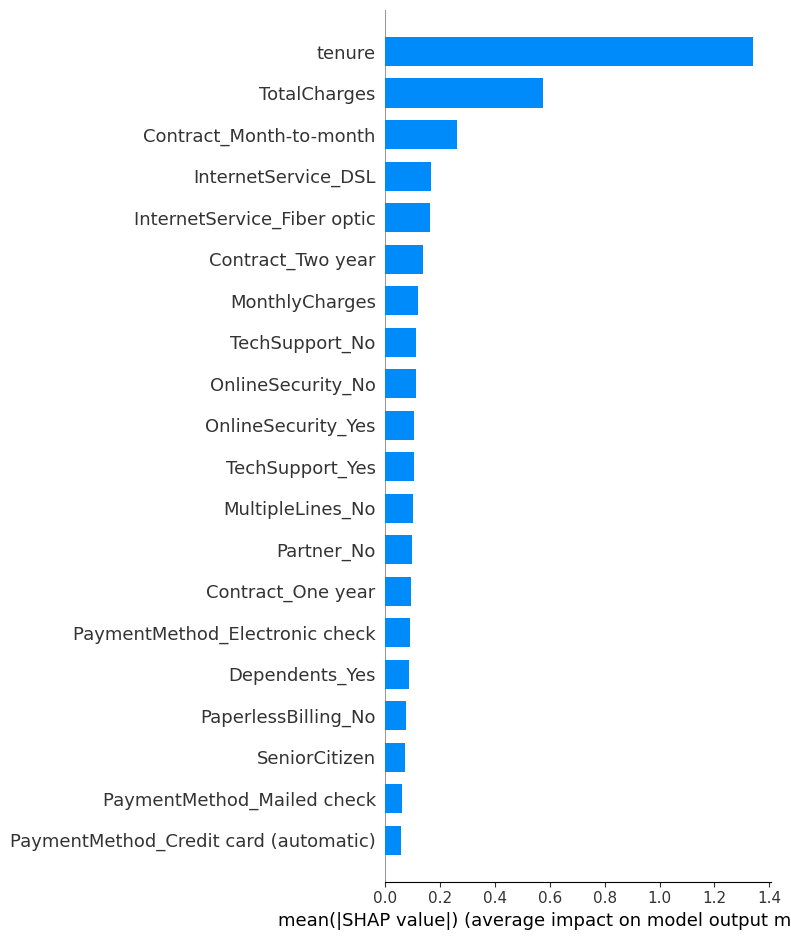

In [40]:
shap.summary_plot(shap_values, X_train, plot_type = "bar")